# Лабораторна робота №8. Структура даних граф. Алгоритми на графах

#### __Мета:__ _засвоїти подання структури даних граф та головні алгоритми роботи з ними засобами Python._ 

#### Виконала роботу студентка групи КН-23-1 Варич Анна

> Завдання 1. Граф: (1,2) {7}, (1,4 ){1}, (1,3) {3}, (4,5) {5},(3,5) {11},(4,6){4}, (5,6) {6}, (4,2){2}, (6,2) {8}.Задати і візуалізувати граф за допомогою коду, наведеного у цій роботі


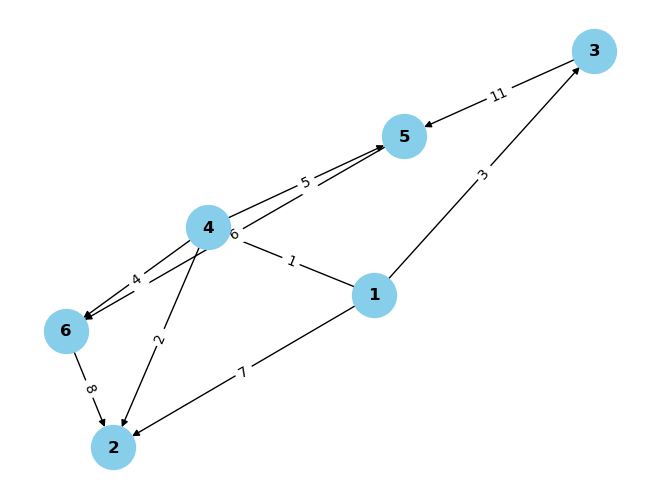

In [2]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self, u, v, w):
        self.graph[u].append((v, w))

myGraph = Graph()

edges = [(1, 2, 7), (1, 4, 1), (1, 3, 3), (4, 5, 5), (3, 5, 11), (4, 6, 4), (5, 6, 6), (4, 2, 2), (6, 2, 8)]

for edge in edges:
    myGraph.addEdge(edge[0], edge[1], edge[2])

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


> Завдання 2. Для свого варіанта реалізувати всі алгоритми, згідно з прикладами, наведеними вище
Граф: (1,2) {7}, (1,4 ){1}, (1,3) {3}, (4,5) {5},(3,5) {11},(4,6){4}, (5,6) {6}, (4,2){2}, (6,2) {8} 


Алгоритм Дейкстри:

In [3]:
import heapq

def dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex]:
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

graph = {
    1: [(2, 7), (4, 1), (3, 3)],
    2: [],
    3: [(5, 11)],
    4: [(5, 5), (6, 4), (2, 2)],
    5: [(6, 6)],
    6: [(2, 8)]
}

start_vertex = 1
print("Дейкстра:", dijkstra(graph, start_vertex))


Дейкстра: {1: 0, 2: 3, 3: 3, 4: 1, 5: 6, 6: 5}


Алгоритм Беллмана-Форда:


In [5]:
def bellman_ford(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    for _ in range(len(graph) - 1):
        for u in graph:
            for v, weight in graph[u]:
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight

    return distances

graph = {
    1: [(2, 7), (4, 1), (3, 3)],
    2: [],
    3: [(5, 11)],
    4: [(5, 5), (6, 4), (2, 2)],
    5: [(6, 6)],
    6: [(2, 8)]
}

start_vertex = 1
print("Беллман-Форд:", bellman_ford(graph, start_vertex))


Беллман-Форд: {1: 0, 2: 3, 3: 3, 4: 1, 5: 6, 6: 5}


### Контрольні запитання:

> 1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.
Граф - це абстрактна математична структура, що складається з вершин (вузлів) та ребер (зв'язків), які їх з'єднують. Приклади: мережі соціальних зв'язків, маршрутні мережі, мережі комп'ютерних зв'язків.
> 2. Які головні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.
Головні види графів: орієнтовані і неорієнтовані. Орієнтовані мають напрямки на ребрах, а неорієнтовані - ні.
> 3. Як можна подати граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.
Граф можна представити в пам'яті комп'ютера за допомогою матриці суміжності або списку суміжності.
> 5. Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.
Алгоритм BFS обходить граф пошарово, спочатку відвідуючи всі вершини на відстані 1 від початкової, потім на відстані 2 і так далі. Використовується для пошуку найкоротшого шляху на невагованому графі.
> 7. Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Надайте приклади задач, де використовується DFS.
Алгоритм DFS обходить граф глибинно, відвідуючи всі вершини одного піддерева перед тим, як переходити до наступного. Використовується для пошуку в глибину, топологічного сортування, виявлення циклів у графі тощо.
> 9. Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?

